In [1]:
import pandas as pd

In [3]:
data = {
    'Day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Decision': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
df

,Day,Outlook,Temperature,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Overcast,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Overcast,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


## Pseudocódigo

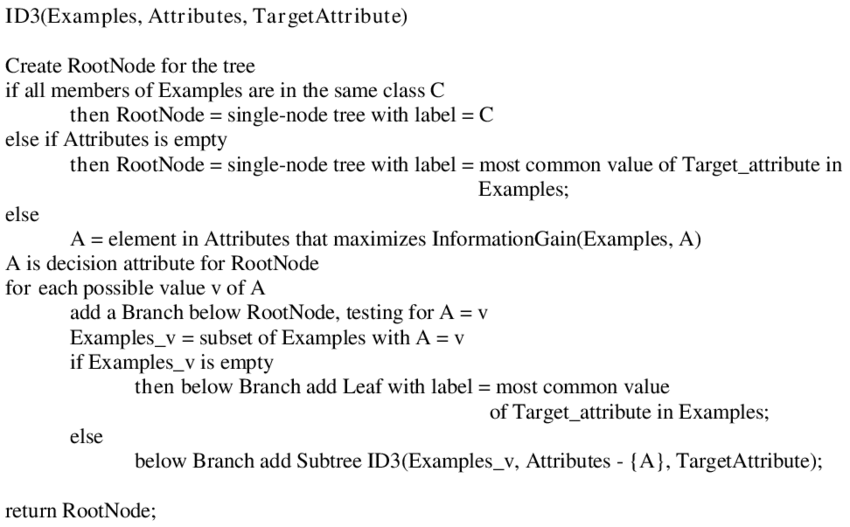

In [12]:
import numpy as np

choice = str(np.random.choice([col for col in list(df.columns) if col not in ['Decision', 'Day']]))
choice

'Wind'

In [48]:
import numpy as np

class Node:
    def __init__(self, value):
        self.value = value
        self.split_feature = None
        self.node_class = None
        self.children = []

def find_best_attribute(df, attributes, target):
    return str(np.random.choice([col for col in attributes if col]))

def ID3(df, attributes, target='Decision'):
    # condição de parada
    # - caso não haja mais atributos
    # - ou, exista apenas um tipo de classe (nó puro)
    if not attributes or len(df[target].unique()) == 1:
        node = Node(df) # salva os dados no nó
        node.node_class = df['Decision'].value_counts().idxmax(); # seleciona a classe que mais aparece
        return node
    else:
        root = Node(df)# criar nó raiz 
        A = find_best_attribute(df, attributes, target) # encontrar o melhor atributo
        root.split_feature = A # define o atributo para as divisoes
        
        for v_i in df.loc[:, A].unique():
            df_v = df.loc[df[A]==v_i, :]
            child = ID3(df_v, [attr for attr in attributes if attr != A], target)

        if child:
            root.children.append(child)
            
    return root

    
target  = 'Decision'
attrs = [col for col in list(df.columns) if col not in [target, 'Day']]

root = ID3(df, attrs, target)

In [58]:
root.split_feature

'Wind'

In [55]:
root.children[1].split_feature

IndexError: list index out of range

In [15]:
df.loc[:, 'Outlook'].unique()

array(['Sunny', 'Overcast', 'Rain'], dtype=object)

In [26]:
df.loc[df['Outlook'] == 'Sunny',:]

,Day,Outlook,Temperature,Humidity,Wind,Decision
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
10,11,Sunny,Mild,Normal,Strong,Yes
